In [ ]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
sns.set(style='ticks')
%matplotlib inline
pd.set_option('display.width', 1500)
pd.set_option('display.max_columns', 100)

sns.set_context('poster')

# Step 1: Load and Explore the Data

In [7]:
nyc_cab=pd.read_csv('nyc_car_hire_data.csv', low_memory=False)

In [8]:
nyc_cab.shape

(1873671, 30)

In [9]:
nyc_cab.head()

,AWND,Base,Day,Dropoff_latitude,Dropoff_longitude,Ehail_fee,Extra,Fare_amount,Lpep_dropoff_datetime,MTA_tax,PRCP,Passenger_count,Payment_type,Pickup_latitude,Pickup_longitude,RateCodeID,SNOW,SNWD,Store_and_fwd_flag,TMAX,TMIN,Tip_amount,Tolls_amount,Total_amount,Trip_distance,Trip_type,Type,VendorID,lpep_pickup_datetime,Trip Length (min)
0,4.7,B02512,1,NaN,NaN,NaN,NaN,33.863498,2014-04-01 00:24:00,NaN,0.0,NaN,NaN,40.7690,-73.9549,NaN,0.0,0.0,NaN,60,39,NaN,NaN,NaN,4.083561,NaN,1,NaN,2014-04-01 00:11:00,13.0
1,4.7,B02512,1,NaN,NaN,NaN,NaN,19.022892,2014-04-01 00:29:00,NaN,0.0,NaN,NaN,40.7267,-74.0345,NaN,0.0,0.0,NaN,60,39,NaN,NaN,NaN,3.605694,NaN,1,NaN,2014-04-01 00:17:00,12.0
2,4.7,B02512,1,NaN,NaN,NaN,NaN,25.498981,2014-04-01 00:34:00,NaN,0.0,NaN,NaN,40.7316,-73.9873,NaN,0.0,0.0,NaN,60,39,NaN,NaN,NaN,4.221763,NaN,1,NaN,2014-04-01 00:21:00,13.0
3,4.7,B02512,1,NaN,NaN,NaN,NaN,28.024628,2014-04-01 00:39:00,NaN,0.0,NaN,NaN,40.7588,-73.9776,NaN,0.0,0.0,NaN,60,39,NaN,NaN,NaN,2.955510,NaN,1,NaN,2014-04-01 00:28:00,11.0
4,4.7,B02512,1,NaN,NaN,NaN,NaN,12.083589,2014-04-01 00:40:00,NaN,0.0,NaN,NaN,40.7594,-73.9722,NaN,0.0,0.0,NaN,60,39,NaN,NaN,NaN,1.922292,NaN,1,NaN,2014-04-01 00:33:00,7.0


In [19]:
nyc_cab.columns

Index(['AWND', 'Base', 'Day', 'Dropoff_latitude', 'Dropoff_longitude', 'Ehail_fee', 'Extra', 'Fare_amount', 'Lpep_dropoff_datetime', 'MTA_tax', 'PRCP', 'Passenger_count', 'Payment_type', 'Pickup_latitude', 'Pickup_longitude', 'RateCodeID', 'SNOW', 'SNWD', 'Store_and_fwd_flag', 'TMAX', 'TMIN', 'Tip_amount', 'Tolls_amount', 'Total_amount', 'Trip_distance', 'Trip_type', 'Type', 'VendorID', 'lpep_pickup_datetime', 'Trip Length (min)'], dtype='object')

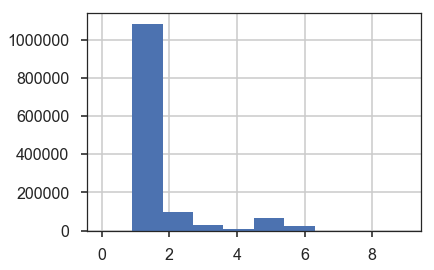

In [12]:
nyc_cab.Passenger_count.hist()


In [17]:
nyc_cab.dtypes

AWND                     float64
Base                      object
Day                        int64
Dropoff_latitude         float64
Dropoff_longitude        float64
Ehail_fee                float64
Extra                    float64
Fare_amount              float64
Lpep_dropoff_datetime     object
MTA_tax                  float64
PRCP                     float64
Passenger_count          float64
Payment_type             float64
Pickup_latitude          float64
Pickup_longitude         float64
RateCodeID               float64
SNOW                     float64
SNWD                     float64
Store_and_fwd_flag        object
TMAX                       int64
TMIN                       int64
Tip_amount               float64
Tolls_amount             float64
Total_amount             float64
Trip_distance            float64
Trip_type                float64
Type                       int64
VendorID                 float64
lpep_pickup_datetime      object
Trip Length (min)        float64
dtype: obj

In [23]:
nyc_cab_sample=nyc_cab.sample(n=1000,random_state=6)
fares=nyc_cab_sample['Fare_amount'].values
trip_lengths=nyc_cab_sample[['Trip Length (min)']].values

Text(0.5,1,'NYC Care Hire Data:\n Trip Duration vs Fare Scatter Plot')

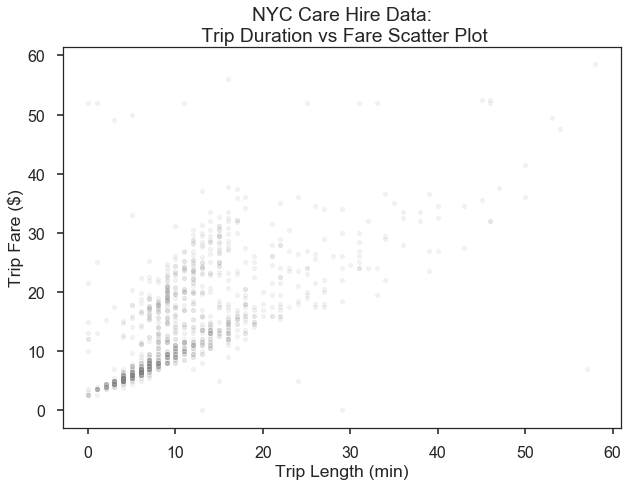

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
ax.scatter(trip_lengths,fares,color='gray',s=20,alpha=0.1)
ax.set_xlabel('Trip Length (min)')
ax.set_ylabel('Trip Fare ($)')
ax.set_title('NYC Care Hire Data:\n Trip Duration vs Fare Scatter Plot')

# Step 2: Modeling the data

In [36]:
Y=nyc_cab_sample['Fare_amount'].values
X=nyc_cab_sample[['Trip Length (min)']].values
X.shape

(1000, 1)

In [37]:
regression=LinearRegression(fit_intercept=True)
regression.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [43]:
regression_line= lambda x: regression.intercept_ + regression.coef_*x

In [54]:
print('The estimated equation of the regression line is: {} + {} * x'.format(regression.intercept_, regression.coef_[0]))

The estimated equation of the regression line is: 6.585636707686286 + 0.7331691319407915 * x


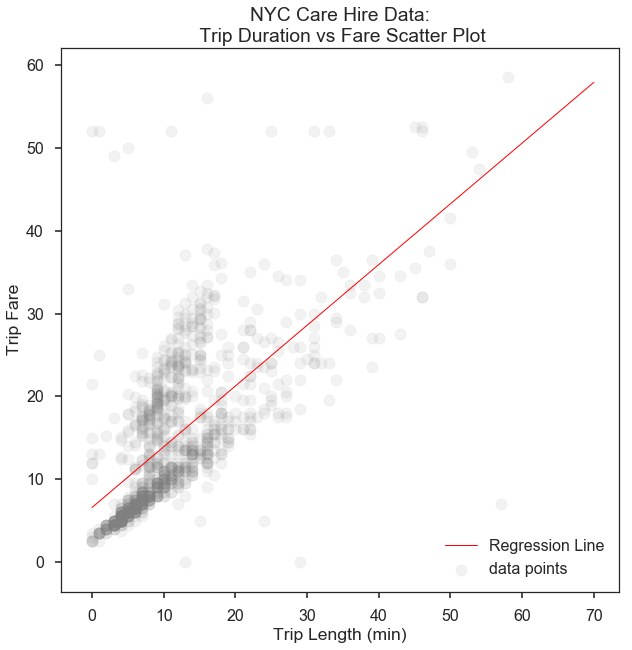

In [51]:
fig,ax=plt.subplots(1,1,figsize=(10,10))
x_vals=np.linspace(0,70,100)
ax.plot(x_vals,regression_line(x_vals),color='red',linewidth=1,label='Regression Line')
ax.scatter(X,Y,color='gray',alpha=0.1,label='data points')

ax.set_xlabel('Trip Length (min)')
ax.set_ylabel('Trip Fare')
ax.set_title('NYC Care Hire Data:\n Trip Duration vs Fare Scatter Plot')
ax.legend(loc='best')

# Evaluate and interpret the model

### 1. Train vs Test Error

In [59]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.33,random_state=6)
train_MSE= np.mean((Y_train - regression.predict(X_train))**2)
test_MSE=np.mean((Y_test - regression.predict(X_test))**2)
print('The train MSE is {}, test MSE is {} '.format(train_MSE,test_MSE))

The train MSE is 48.59886786981504, test MSE is 52.199666372395114 


### 2. Unceratainity in model parameter Estimates

In [61]:
def find_regression_params(regression_model,samples):
    nyc_cab_sample=nyc_cab.sample(n=samples)
    
    Y=nyc_cab_sample['Fare_amount'].values
    X=nyc_cab_sample[['Trip Length (min)']].values
    
    
    regression_model.fit(X,Y)
    
    return regression_model.intercept_, regression_model.coef_[0]

In [67]:
regression_model=LinearRegression(fit_intercept=True)

regression_params=[]
for i in range(500):
    regression_params.append(find_regression_params(regression_model,1000))
regression_params=np.array(regression_params)    

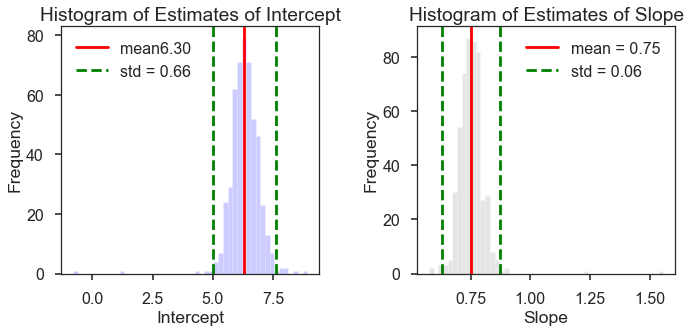

In [97]:
fig,ax=plt.subplots(1,2,figsize=(10,5))

ax[0].hist(regression_params[:,0],bins=50,color='blue',linewidth=1,alpha=0.2,edgecolor='white')
ax[0].axvline(x=regression_params[:,0].mean(),color='red',label='mean{0:.2f}'.format(regression_params[:,0].mean()))

ax[0].axvline(x=regression_params[:,0].mean()-2*regression_params[:,0].std(),color='green',linestyle='--',label='std = {0:.2f}'.format(regression_params[:, 0].std()))
ax[0].axvline(x=regression_params[:,0].mean()+2*regression_params[:,0].std(),color='green',linestyle='--')

ax[0].set_xlabel('Intercept')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Histogram of Estimates of Intercept')
ax[0].legend(loc='best')

ax[1].hist(regression_params[:, 1], bins=50, color='gray', edgecolor='white', linewidth=1, alpha=0.2)
ax[1].axvline(x=regression_params[:, 1].mean(), color='red', label='mean = {0:.2f}'.format(regression_params[:, 1].mean()))
ax[1].axvline(x=regression_params[:, 1].mean() - 2 * regression_params[:, 1].std(), color='green', linestyle='--', label='std = {0:.2f}'.format(regression_params[:, 1].std()))
ax[1].axvline(x=regression_params[:, 1].mean() + 2 * regression_params[:, 1].std(), color='green', linestyle='--')

ax[1].set_xlabel('Slope')
ax[1].set_ylabel('Frequency')
ax[1].set_title('Histogram of Estimates of Slope')
ax[1].legend(loc='best')

plt.tight_layout()

## Consider a different model for the data-KNN

In [99]:
nyc_cab_sample = nyc_cab.sample(n=1000, random_state=1)

Y = nyc_cab_sample['Fare_amount'].values
X = nyc_cab_sample[['Trip Length (min)']].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=0)

In [100]:
knn_model=KNeighborsRegressor(n_neighbors=2)
knn_model.fit(X_train,Y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=2, p=2,
          weights='uniform')

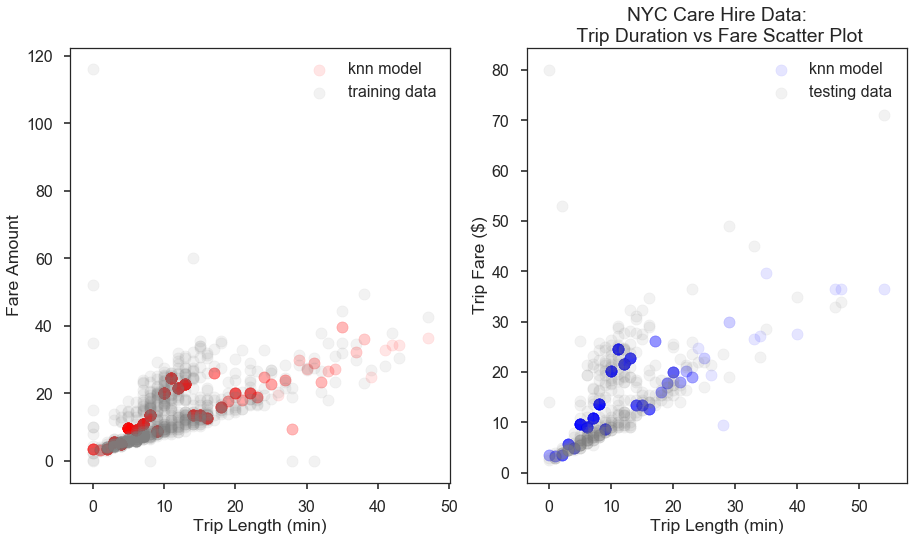

In [110]:
fig,ax=plt.subplots(1,2,figsize=(15,8))
ax[0].scatter(X_train,knn_model.predict(X_train),color='red', alpha=0.1,label='knn model')
ax[0].scatter(X_train,Y_train,color='gray',alpha=0.1,label='training data')

ax[0].set_xlabel('Trip Length (min)')
ax[0].set_ylabel('Fare Amount')
ax[0].legend(loc='best')

ax[1].scatter(X_test, knn_model.predict(X_test), color='blue', alpha=0.1, label='knn model')
ax[1].scatter(X_test, Y_test, color='gray', alpha=0.1, label='testing data')

ax[1].set_xlabel('Trip Length (min)')
ax[1].set_ylabel('Trip Fare ($)')
ax[1].set_title('NYC Care Hire Data:\n Trip Duration vs Fare Scatter Plot')
ax[1].legend(loc='best')

In [114]:
train_MSE= np.mean((Y_train - knn_model.predict(X_train))**2)
test_MSE= np.mean((Y_test - knn_model.predict(X_test))**2)

print('The train MSE is {}, the test MSE is {}'.format(train_MSE, test_MSE))

The train MSE is 70.9224876379618, the test MSE is 77.62695077723178


In [117]:
train_MSEs=[]
test_MSEs=[]

for i in range(1,100):
    knn_model = KNeighborsRegressor(n_neighbors=i)
    knn_model.fit(X_train, Y_train)
    train_MSEs.append(np.mean((Y_train - knn_model.predict(X_train))**2))
    test_MSEs.append(np.mean((Y_test - knn_model.predict(X_test))**2))
    

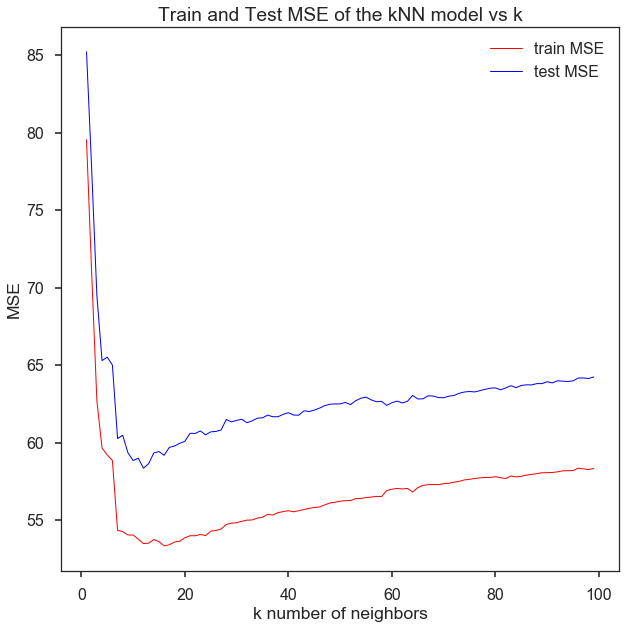

In [118]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

ax.plot(range(1, 100), train_MSEs, color='red', linewidth=1.0, label='train MSE')
ax.plot(range(1, 100), test_MSEs, color='blue', linewidth=1.0, label='test MSE')


ax.set_xlabel('k number of neighbors')
ax.set_ylabel('MSE')
ax.set_title('Train and Test MSE of the kNN model vs k')
ax.legend(loc='best')